<a href="https://colab.research.google.com/github/kimgyubeom0218/Project/blob/main/1%EC%A3%BC%EC%B0%A8_%EC%A3%BC%EC%A0%9C%EB%B6%84%EC%84%9D_%ED%8C%A8%ED%82%A4%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ch1. 크롤링

In [ ]:
from bs4 import BeautifulSoup
import requests
import time
from datetime import datetime
import pandas as pd
import numpy as np

In [ ]:
mycolumns = ['date', 'title','content']
page = 0
date_list = []
title_list = []
content_list = []

while page <= 19:
    url = "https://www.mk.co.kr/news/stock/?page=" + str(page)
    response = requests.get(url)
    response.encoding = 'cp949'
    html = response.text

    soup = BeautifulSoup(html,'html.parser')

    dl_tmp = soup.find_all('dl',{'class':'article_list'})

    for i in dl_tmp:
        try :
        
            title = i.find('dt',{'class' : 'tit'}).text
            content = i.find('span' , {'class' : 'desctxt'}).text
            date = i.find('span',{'class' : 'date'}).text
    
            title_list.append(title)
            content_list.append(content)
            date_list.append(date)
    
        except:
            continue
    page += 1
    
mydata = { 'date' : date_list, 'title' : title_list , 'content' : content_list}

my_df = pd.DataFrame(data = mydata, columns = mycolumns)
    

In [ ]:

import csv
my_df.to_csv("crawling1.csv", mode='w')


Ch.2 워드클라우드

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import konlpy
from konlpy.tag import Okt

In [ ]:
okt = Okt()
noun_list = []
for i in range(0,499):
  noun_list.extend(okt.nouns(my_df['title'][i]))

In [ ]:
print(noun_list)

['삼성', '전자', '창사', '최대', '매출', '달성', '훨훨', '나', '게임', '주', '달', '이상', '상승', '김태욱', '총', '코스닥', '상', '장사', '대표', '상승', '트럼프', '테마주', '점', '매수', '인프라', '투자', '시장', '것', '기업', '지배구조', '보고서', '공시', '우수', '법인', '아모레퍼시픽', '선정', '풍산', '영업', '이익', '작년', '동기', '대비', '보', '전자', '매출', '역대', '최대', '분기', '기준', '첫', '돌파', '이노', '텍', '영업', '이익', '작년', '동기', '대비', '엘에스', '렉', '트릭', '영업', '이익', '작년', '대비', '뱅크', '영업', '이익', '종합', '현대', '중공업', '지주', '주요', '계', '열사', '선전', '영업', '익', '종합', '롯데', '칠성', '영업', '이익', '제로', '탄산음료', '견인', '종합', '현대', '모비스', '반도체', '급난', '실적', '주춤', '영업', '이익', '종합', '주가', '바닥', '호실', '하이닉스', '껑충', '현대', '중공업', '지주', '영업', '이익', '작년', '대비', '아이', '넷', '로봇', '기자', '특징', '주', '반도체', '재료', '부품', '테마', '상승세', '뱅크', '영업', '이익', '작년', '대비', '호', '중공업', '영업', '이익', '작년', '대비', '한국', '조선해', '영업', '이익', '작년', '대비', '대미', '포', '조선', '영업', '이익', '작년', '동기', '대비', '현대', '모비스', '영업', '이익', '작년', '대비', '아베', '스틸', '영업', '이익', '흑자', '전환', '아이', '넷', '로봇', '기자', '특징', '주', '케이', '제이', '반도체', '

In [ ]:
from PIL import Image

In [ ]:
from collections import Counter
nouns_freq = Counter(noun_list)


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500,
               background_color = 'white',
               font_path = "/content/drive/MyDrive/NanumSquare_acR.ttf", 
               min_font_size = 20)


In [ ]:
wc.generate_from_frequencies(dict(nouns_freq))

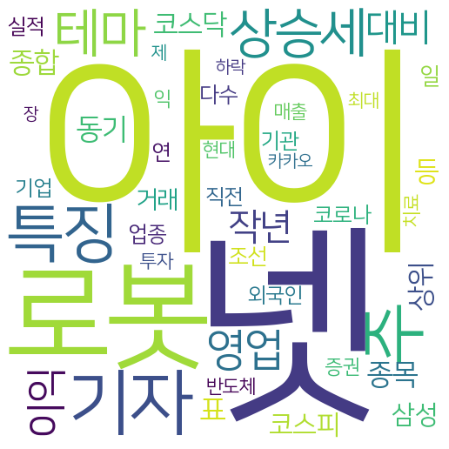

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
